In [ ]:
import pathlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import experimental

from google.colab import drive
import glob
from glob import glob
import pandas as pd



In [ ]:
# Setting the path directories for train data and test data
# Since we are using google drive we have to first mount it
drive.mount("/content/gdrive")

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.m

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

## Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

## Defining our training set

In [ ]:

## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# Importing images from drive
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train, subset = "training",validation_split = 0.2,
                                                       seed = 123, batch_size=batch_size, label_mode = "categorical",
                                                       image_size = (img_height, img_width))


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


## Our Validation set

In [ ]:

## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train, subset = "validation",validation_split = 0.2,
                                                       seed = 123, batch_size=batch_size, label_mode = "categorical",
                                                       image_size = (img_height, img_width))

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
     

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data

#### Below we will visualize one instance of all the nine classes present in the dataset

In [ ]:
os.chdir("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
os.listdir()

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
from PIL import Image

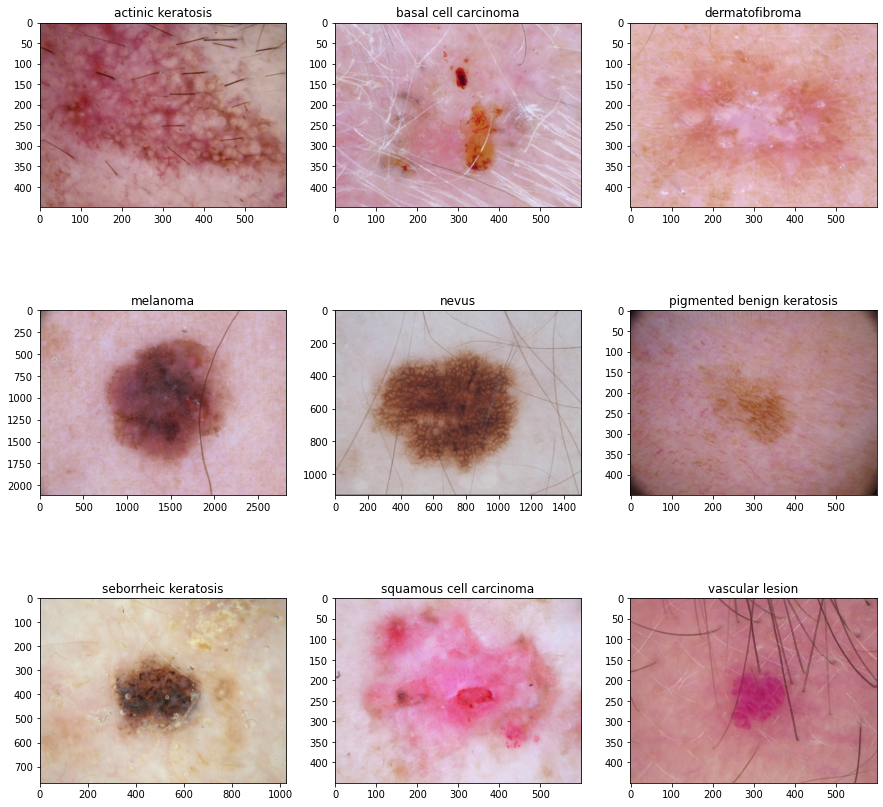

In [ ]:
for index, name in enumerate(class_names):
  plt.subplot(3,3,index + 1)
  path_name = name + "/" + os.listdir(name + "/")[0]
  plt.imshow(Image.open(path_name))
  plt.title(str(name)) 
  plt.gcf().set_size_inches(15,15)


  

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
     

## Creating our first model

We have used layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:

rescaling_layer = layers.experimental.preprocessing.Rescaling(1./225)
normalized_train_ds = train_ds.map(lambda x, y: (rescaling_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (rescaling_layer(x), y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Below is the model name nn_model1 which translates to neural network model 1

In [ ]:
nn_model1 = Sequential()



nn_model1.add(layers.Conv2D(filters = 64, kernel_size = (2,2), activation = "relu", input_shape = (img_height, img_width, 3)))
nn_model1.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
nn_model1.add(layers.MaxPooling2D(pool_size=(4,4)))


nn_model1.add(layers.Conv2D(filters = 32, kernel_size = (2,2), activation = "relu"))
nn_model1.add(layers.MaxPooling2D(pool_size=(2,2)))



nn_model1.add(layers.Flatten())

nn_model1.add(layers.Dense(540, activation = "relu"))


nn_model1.add(layers.Dense(len(class_names), activation = "softmax"))


## Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function

optimizer = "Adam"
loss = "categorical_crossentropy"

nn_model1.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
nn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 179, 179, 64)      832       
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 177, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14112)             0

## Training our first  model

In [ ]:
epochs = 20
history_for_nn1 = nn_model1.fit(
  normalized_train_ds,
  validation_data=normalized_val_ds,
  epochs=epochs
)
  

Epoch 1/20
56/56 [==============================] - 716s 3s/step - loss: 2.0971 - accuracy: 0.2065 - val_loss: 2.0793 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 5s 94ms/step - loss: 1.9529 - accuracy: 0.2667 - val_loss: 1.6908 - val_accuracy: 0.3848
Epoch 3/20
56/56 [==============================] - 5s 90ms/step - loss: 1.6963 - accuracy: 0.4079 - val_loss: 1.6554 - val_accuracy: 0.4452
Epoch 4/20
56/56 [==============================] - 5s 89ms/step - loss: 1.5021 - accuracy: 0.4805 - val_loss: 1.4560 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 5s 97ms/step - loss: 1.3413 - accuracy: 0.5279 - val_loss: 1.4148 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 5s 94ms/step - loss: 1.2192 - accuracy: 0.5653 - val_loss: 1.3766 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 5s 95ms/step - loss: 1.1129 - accuracy: 0.6032 - val_loss: 1.4182 - val_accuracy: 0.5324
Epoch 8/20
56

In [ ]:
def plot_accuracies(history, epochs, figsize = (15,15)):
   acc = history.history["accuracy"]
   val_acc = history.history["val_accuracy"]

   

   epochs_range = range(epochs)
   plt.gcf().set_size_inches(figsize)
   plt.plot(epochs_range, acc, label='Training Accuracy')
   plt.plot(epochs_range, val_acc, label='Validation Accuracy')
   plt.legend(loc='lower right')
   plt.title('Training and Validation Accuracy') 
  
   
    
    
def plot_loss(history, epochs, figsize = (15,15)):
   

   loss = history.history["loss"]
   val_loss = history.history["val_loss"]

   epochs_range = range(epochs)
   plt.gcf().set_size_inches(figsize)
   plt.plot(epochs_range, loss, label='Training Loss')
   plt.plot(epochs_range, val_loss, label='Validation Loss')
   plt.legend(loc='lower right')
   plt.title('Training and Validation Accuracy') 
      





## Visualizing training results

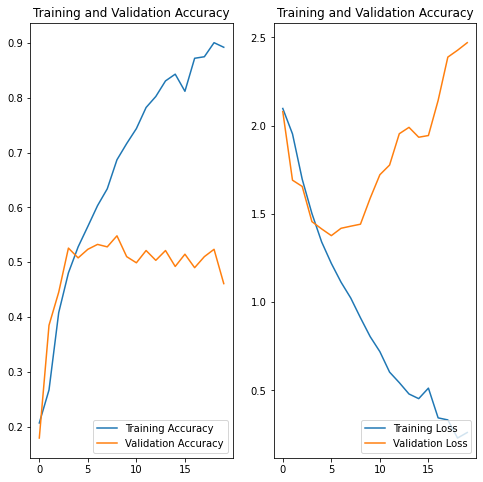

In [ ]:
plt.subplot(1,2,1)
plot_accuracies(history = history_for_nn1, epochs = 20, figsize = (8,8))

plt.subplot(1,2,2)
plot_loss(history = history_for_nn1, epochs = 20,figsize = (8,8))


## Findings:
- We are using a simple CNN model which has a pooling layer right after Covolution layer without drop outs, data augmentation or batch Normalization
- After observing the plots and performance of our model, we clearly see that the model is overfitting as it eminent from the Accuracy and Loss plos

- We can observe that the validation accuracy is erractic around 50% whereas the training accuracy is increasing continuously

- The same be said for the Loss of Training and accuracy; The Loss certainly decreaes for Training but for validation the loss shoots down and then up

In [ ]:
# We will be using some data augmentation strategy to counter our overfitting which we experienced in our previous model
# We will use tf.keras.preprocessing.image.ImageDataGenerator
# Below are the necessary libraries which we will use to augment our data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
# But first we will display a sample image of our data augmentation strategy
sample_datagen = ImageDataGenerator(
                                    rotation_range = 40,
                                   
                                    zoom_range = 0.09,
                                    #width_shift_range=0.02,
                                    height_shift_range=0.02,
                                    horizontal_flip = True,
                                    )


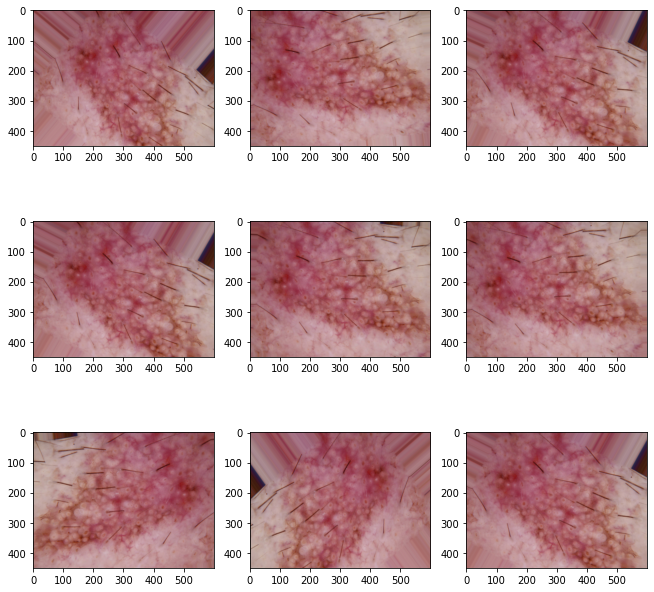

In [ ]:


sample_img = load_img("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg")
sample_img_array = img_to_array(sample_img)
final_sample_img = np.expand_dims(sample_img_array, 0)
iter = sample_datagen.flow(final_sample_img, batch_size = 1)

for i in range(9):
  plt.subplot(330 + 1 + i)
  batches = iter.next()
  plt.imshow(batches[0].astype("uint8"))
  plt.gcf().set_size_inches(11, 11)
plt.show()






##Todo:

Create the model, compile and train the model

In [ ]:

# We will use droputs and batch normalisations in our model to counter overfitting




# But first let's apply all the transformations to our train and validation sets
train_datagen = ImageDataGenerator(rescale = 1./255.0, 
                                   rotation_range = 40,
                                    featurewise_center = True,
                                   samplewise_center = True,
                                    zoom_range = 0.09,
                                    #width_shift_range=0.02,
                                    height_shift_range=0.02,
                                    horizontal_flip = True,
                                   validation_split = 0.2)

# According to the documentation and the best of our knowledge these transformation are best suited to reduce overfitting in our model

test_datagen = ImageDataGenerator(rescale = 1./255.0)

In [ ]:

train_data_aug = train_datagen.flow_from_directory(directory = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/",
                                                   target_size = (img_height, img_width),
                                                   color_mode = "rgb",
                                                   batch_size = batch_size,
                                                   subset = "training",
                                                   shuffle  = True,
                                                   class_mode = "categorical",
                                                   seed = 123)

validation_data_aug = train_datagen.flow_from_directory(directory = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/",
                                                   target_size = (img_height, img_width),
                                                   color_mode = "rgb",
                                                   batch_size = batch_size,
                                                   subset = "validation",
                                                   shuffle  = True,
                                                   class_mode = "categorical",
                                                   seed = 123)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


## Todo:

Create the model, compile and train the model

## Creating our Second Model

We have used nn_model2 as our variable for our second model which roughly translatees to neural network model 2

In [ ]:
nn_model2 = Sequential()



nn_model2.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", kernel_initializer = "glorot_uniform",
                            input_shape = (img_height, img_width, 3)))


nn_model2.add(Dropout(0.10))
nn_model2.add(layers.Conv2D(filters = 54, kernel_size = (3,3), activation = "relu", kernel_initializer = "glorot_uniform"))

nn_model2.add(layers.MaxPooling2D(pool_size=(2,2)))

nn_model2.add(layers.Conv2D(filters = 32, kernel_size = (2,2), activation = "relu", kernel_initializer = "glorot_uniform"))


nn_model2.add(layers.MaxPooling2D(pool_size=(2,2)))



nn_model2.add(layers.Flatten())
nn_model2.add(layers.Dense(700, activation = "relu"))
nn_model2.add(Dropout(0.35))
nn_model2.add(layers.Dense(128, activation = "relu"))


nn_model2.add(Dropout(0.5))




nn_model2.add(layers.Dense(len(class_names), activation = "softmax"))


## Compiling the model

In [ ]:
optimizer = "Adam"
loss = "categorical_crossentropy"

nn_model2.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = ["accuracy"])

In [ ]:
# View the summary of all layers
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 128)     3584      
                                                                 
 dropout (Dropout)           (None, 178, 178, 128)     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 176, 176, 54)      62262     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 88, 88, 54)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 32)        6944      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

## Training the model

In [ ]:
## train your model for 20 epochs
epochs = 20


history_for_nn2 = nn_model2.fit(train_data_aug, epochs = epochs,
                                  validation_data = validation_data_aug)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 65s 1s/step - loss: 1.8533 - accuracy: 0.3287 - val_loss: 1.9843 - val_accuracy: 0.2680
Epoch 2/20
57/57 [==============================] - 56s 984ms/step - loss: 1.6546 - accuracy: 0.4139 - val_loss: 1.7438 - val_accuracy: 0.3829
Epoch 3/20
57/57 [==============================] - 56s 987ms/step - loss: 1.5472 - accuracy: 0.4652 - val_loss: 1.8258 - val_accuracy: 0.3626
Epoch 4/20
57/57 [==============================] - 66s 1s/step - loss: 1.5263 - accuracy: 0.4791 - val_loss: 1.7530 - val_accuracy: 0.3784
Epoch 5/20
57/57 [==============================] - 67s 1s/step - loss: 1.4772 - accuracy: 0.4969 - val_loss: 1.8124 - val_accuracy: 0.3671
Epoch 6/20
57/57 [==============================] - 56s 986ms/step - loss: 1.4384 - accuracy: 0.5097 - val_loss: 1.8263 - val_accuracy: 0.3896
Epoch 7/20
57/57 [==============================] - 66s 1s/step - loss: 1.3873 - accuracy: 0.5281 - val_loss: 1.6717 - val_accuracy: 0.4257
Epoch 8/20


## Visualizing the results

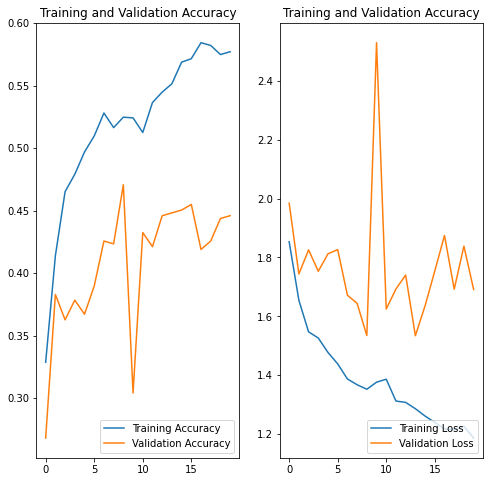

In [ ]:
plt.subplot(1,2,1)
plot_accuracies(history = history_for_nn2, epochs = 20, figsize = (8,8))

plt.subplot(1,2,2)
plot_loss(history = history_for_nn2, epochs = 20, figsize = (8,8))


In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

## Findings:
- We did solve some overfitting but that the cost of sheer accuracy
- We did reduce overfitting upto some point which is clear when we compare our graphs with our vanilla CNN before the scores of train and validation are much closer to each other but the accuracy takes a brutal hit as it gives us around 58% accuracy on the training and 46% accuracy on the test compared to 93% accuracy on the train with 52% validation accuracy


Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
# Defining a function to dispaly class distribution in a dataframe
def class_distribution(folder_name, class_names):
  df_class_distribution = pd.DataFrame()
  number_of_images_per_class = []

  for name in class_names:
    path_to_class = folder_name + "/" + name + "/"
    number_of_images_per_class.append(len(os.listdir(path_to_class)))
  
  df_class_distribution["Class_Names"] = class_names
  df_class_distribution["No_of_images"] = number_of_images_per_class
  df_class_distribution["Percentage"] = df_class_distribution["No_of_images"].apply(lambda x : round((x/sum(number_of_images_per_class)) * 100, 3))

  return df_class_distribution

path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

distribution = class_distribution(path, class_names)
distribution

,Class_Names,No_of_images,Percentage
0,actinic keratosis,114,5.092
1,basal cell carcinoma,376,16.793
2,dermatofibroma,95,4.243
3,melanoma,438,19.562
4,nevus,357,15.945
5,pigmented benign keratosis,462,20.634
6,seborrheic keratosis,77,3.439
7,squamous cell carcinoma,181,8.084
8,vascular lesion,139,6.208


In [ ]:
# path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# number_of_images_per_class = []

# for name in class_names:
#   path_to_class = path + "/" + name + "/"
#   print(f"Class {name} has about {len(os.listdir(path_to_class))} images \n")
#   number_of_images_per_class.append(len(os.listdir(path_to_class)))

# print(class_names)
# print(number_of_images_per_class)

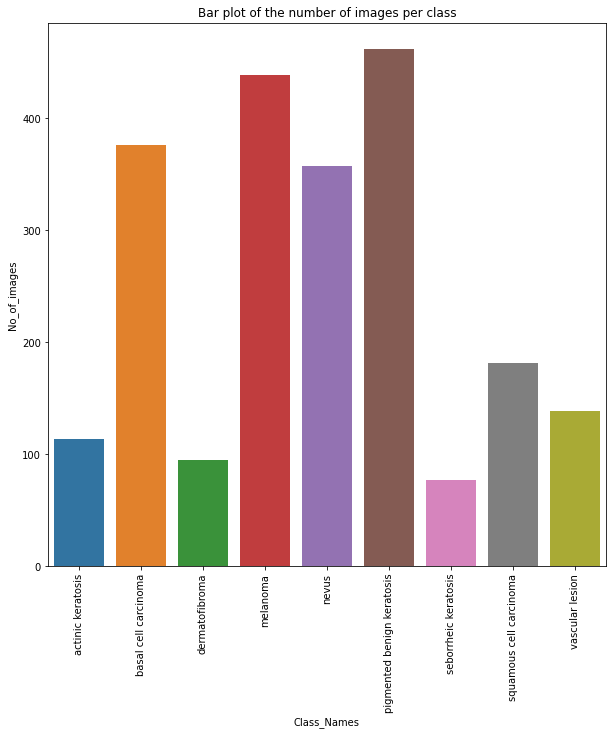

In [ ]:
# We will also visualize this in the form of a bar plot
# And for this we will use seaborn for it's versatility
import seaborn as sns

sns.barplot(x = "Class_Names", y = "No_of_images", data = distribution)
plt.xticks(rotation = 90)
plt.gcf().set_size_inches(10, 10)
plt.title("Bar plot of the number of images per class")
plt.show()

## Findings:

- **Which class has the least number of samples?**

 - ANS: Seborrheic Keratosis has the least number of samples i.e 77

- **Which classes dominate the data in terms proportionate number of samples?**
 - ANS: Pigmented Benign Keratosis dominates the classes



**Context:** You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.



In [ ]:
!pip install Augmentor
 
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the `Pipeline’s` sample() method.

In [ ]:
# path_to_training_dataset = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
# import Augmentor
# for i in class_names:
#     p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/" + i)
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
     

In [ ]:
import Augmentor
# Defining a function for using Augmentor
def use_Augmentor(path_to_train_ds, output_dir, sample_imgs):
  for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory = output_dir + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(sample_imgs)

In [ ]:

# Setting a path to our train dataset inorder to use augmentor here we will generate about 500 images per class which amounts upto 4500 images
path_to_training_dataset = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
output_dir = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/"


use_Augmentor(path_to_training_dataset, output_dir=output_dir, sample_imgs = 500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50D80C2550>: 100%|██████████| 500/500 [00:19<00:00, 25.10 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5062C5FB20>: 100%|██████████| 500/500 [00:23<00:00, 21.07 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5042E02A60>: 100%|██████████| 500/500 [00:22<00:00, 22.57 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F50D818DF10>: 100%|██████████| 500/500 [01:48<00:00,  4.61 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=576x768 at 0x7F5042E3BF40>: 100%|██████████| 500/500 [01:33<00:00,  5.36 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/pigmented benign keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5042E1FD00>: 100%|██████████| 500/500 [00:19<00:00, 26.29 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5042EAE280>: 100%|██████████| 500/500 [00:44<00:00, 11.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50C0374D90>: 100%|██████████| 500/500 [00:21<00:00, 23.38 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F50C031E5E0>: 100%|██████████| 500/500 [00:19<00:00, 25.86 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train_new = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output")
image_count_train = len(list(data_dir_train_new.glob('*/*.jpg')))
print(image_count_train)
     

4500


In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train_new, '*', '*.jpg'))]
#path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(str(data_dir_train_new) + '/*/*.jpg')]
#lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
 

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [ ]:
path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output"

distribution = class_distribution(path, class_names)
distribution

,Class_Names,No_of_images,Percentage
0,actinic keratosis,500,11.111
1,basal cell carcinoma,500,11.111
2,dermatofibroma,500,11.111
3,melanoma,500,11.111
4,nevus,500,11.111
5,pigmented benign keratosis,500,11.111
6,seborrheic keratosis,500,11.111
7,squamous cell carcinoma,500,11.111
8,vascular lesion,500,11.111


### Training the model on the given data using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
     

### Creating a training dataset

In [ ]:
data_dir_train_balanced = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output"

train_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_balanced,
  label_mode = "categorical",
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


### Creating a validation dataset

In [ ]:
val_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_balanced,
  label_mode = "categorical",
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_aug = train_ds_bal.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_aug = val_ds_bal.cache().prefetch(buffer_size=AUTOTUNE)

### Creating our third model 

In [ ]:
## Normalizing our data

rescaling_layer_for_aug = layers.experimental.preprocessing.Rescaling(1./225)
normalized_train_ds_aug = train_ds_aug.map(lambda x, y: (rescaling_layer_for_aug(x), y))
normalized_val_ds_aug = val_ds_aug.map(lambda x, y: (rescaling_layer_for_aug(x), y))

In [ ]:
nn_model_3 = Sequential()



nn_model_3.add(layers.Conv2D(filters = 84, kernel_size = (2,2), activation = "relu", input_shape = (img_height, img_width, 3)))
nn_model_3.add(layers.Dropout(0.25))
nn_model_3.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
nn_model_3.add(layers.MaxPooling2D(pool_size=(4,4)))


nn_model_3.add(layers.Conv2D(filters = 54, kernel_size = (2,2), activation = "relu"))
nn_model_3.add(layers.MaxPooling2D(pool_size=(2,2)))




nn_model_3.add(layers.Flatten())

nn_model_3.add(layers.Dense(1000, activation = "relu", kernel_regularizer = regularizers.L2(0.0002)))

nn_model_3.add(layers.Dropout(0.35))
nn_model_3.add(layers.Dense(258, activation = "relu"))

nn_model_3.add(layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.L2(0.0002)))
nn_model_3.add(layers.Dropout(0.4))

nn_model_3.add(layers.Dense(len(class_names), activation = "softmax"))

### Compiling our model

In [ ]:
optimizer = experimental.Adam()
loss = "categorical_crossentropy"

nn_model_3.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = ["accuracy"])

In [ ]:
nn_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 179, 179, 84)      1092      
                                                                 
 dropout_6 (Dropout)         (None, 179, 179, 84)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 177, 177, 64)      48448     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 43, 43, 54)        13878     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 21, 21, 54)       0         
 2D)                                                  

### Training our model

In [ ]:
epochs = 30
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              min_lr = 0.000001,
                              patience = 2,
                              verbose = 1)
history_for_nn3 = nn_model_3.fit(normalized_train_ds_aug, epochs = epochs,
                                  validation_data = normalized_val_ds_aug,
                         callbacks = [reduce_lr])

Epoch 1/30
113/113 [==============================] - 40s 211ms/step - loss: 2.4175 - accuracy: 0.1478 - val_loss: 2.1549 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 2/30
113/113 [==============================] - 20s 174ms/step - loss: 2.0914 - accuracy: 0.2500 - val_loss: 1.8741 - val_accuracy: 0.3178 - lr: 0.0010
Epoch 3/30
113/113 [==============================] - 20s 175ms/step - loss: 1.7935 - accuracy: 0.3456 - val_loss: 1.7413 - val_accuracy: 0.4022 - lr: 0.0010
Epoch 4/30
113/113 [==============================] - 20s 173ms/step - loss: 1.6068 - accuracy: 0.4158 - val_loss: 1.5231 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 5/30
113/113 [==============================] - 19s 170ms/step - loss: 1.5371 - accuracy: 0.4439 - val_loss: 1.5768 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 6/30
113/113 [==============================] - 20s 173ms/step - loss: 1.4104 - accuracy: 0.4872 - val_loss: 1.4716 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 7/30
113/113 [==============================] 

## Visualizing our 3rd Model

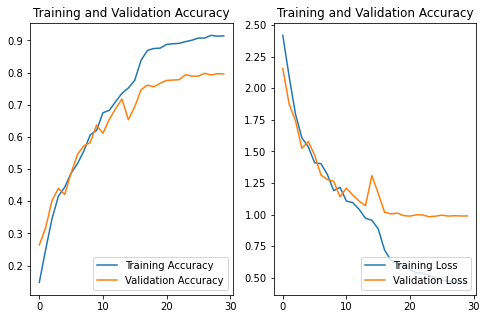

In [ ]:
plt.subplot(1,2,1)
plot_accuracies(history = history_for_nn3, epochs = 30, figsize = (8,5))

plt.subplot(1,2,2)
plot_loss(history = history_for_nn3, epochs = 30, figsize = (8,5))

In [ ]:
# We will now generate 1000 images using augmentor lib and store those images in output_1000

In [ ]:
path_to_training_dataset = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
output_dir = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/"


use_Augmentor(path_to_training_dataset, output_dir=output_dir, sample_imgs = 1000)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5043105EE0>: 100%|██████████| 1000/1000 [00:38<00:00, 26.11 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5062B9B460>: 100%|██████████| 1000/1000 [00:40<00:00, 24.78 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F504E3ADCD0>: 100%|██████████| 1000/1000 [00:41<00:00, 23.90 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/melanoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F5062FB0250>: 100%|██████████| 1000/1000 [03:24<00:00,  4.89 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/nevus.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7F5165DFDC10>: 100%|██████████| 1000/1000 [02:51<00:00,  5.82 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/pigmented benign keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F50405F0B80>: 100%|██████████| 1000/1000 [00:39<00:00, 25.02 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5042EAE790>: 100%|██████████| 1000/1000 [01:32<00:00, 10.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5165DFDFD0>: 100%|██████████| 1000/1000 [00:39<00:00, 25.19 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5062B9B910>: 100%|██████████| 1000/1000 [00:40<00:00, 24.63 Samples/s]


In [ ]:

path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000"

distribution = class_distribution(path, class_names)
distribution

,Class_Names,No_of_images,Percentage
0,actinic keratosis,1000,11.111
1,basal cell carcinoma,1000,11.111
2,dermatofibroma,1000,11.111
3,melanoma,1000,11.111
4,nevus,1000,11.111
5,pigmented benign keratosis,1000,11.111
6,seborrheic keratosis,1000,11.111
7,squamous cell carcinoma,1000,11.111
8,vascular lesion,1000,11.111


In [ ]:
data_dir_train_balanced = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/output_1000"

train_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_balanced,
  label_mode = "categorical",
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [ ]:
val_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_balanced,
  label_mode = "categorical",
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_aug = train_ds_bal.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_aug = val_ds_bal.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
## Normalizing our data

rescaling_layer_for_aug = layers.experimental.preprocessing.Rescaling(1./225)
normalized_train_ds_aug = train_ds_aug.map(lambda x, y: (rescaling_layer_for_aug(x), y))
normalized_val_ds_aug = val_ds_aug.map(lambda x, y: (rescaling_layer_for_aug(x), y))

## Creating our fourth model

In [ ]:
nn_model_4 = Sequential()



nn_model_4.add(layers.Conv2D(filters = 84, kernel_size = (2,2), activation = "relu", input_shape = (img_height, img_width, 3)))
nn_model_4.add(layers.Dropout(0.25))
nn_model_4.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
nn_model_4.add(layers.MaxPooling2D(pool_size=(4,4)))


nn_model_4.add(layers.Conv2D(filters = 54, kernel_size = (2,2), activation = "relu"))
nn_model_4.add(layers.MaxPooling2D(pool_size=(2,2)))




nn_model_4.add(layers.Flatten())

nn_model_4.add(layers.Dense(1000, activation = "relu", kernel_regularizer = regularizers.L2(0.0002)))

nn_model_4.add(layers.Dropout(0.35))
nn_model_4.add(layers.Dense(258, activation = "relu"))

nn_model_4.add(layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.L2(0.0002)))
nn_model_4.add(layers.Dropout(0.4))

nn_model_4.add(layers.Dense(len(class_names), activation = "softmax"))

In [ ]:
nn_model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 179, 179, 84)      1092      
                                                                 
 dropout_9 (Dropout)         (None, 179, 179, 84)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 177, 177, 64)      48448     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 43, 43, 54)        13878     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 21, 21, 54)       0         
 2D)                                                  

## Compiling our model

In [ ]:
optimizer = experimental.Adam()
loss = "categorical_crossentropy"

nn_model_4.compile(optimizer = optimizer,
                  loss = loss,
                  metrics = ["accuracy"])

## Training our model

In [ ]:
epochs = 30
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              min_lr = 0.000001,
                              patience = 2,
                              verbose = 1)
history_for_nn4 = nn_model_4.fit(normalized_train_ds_aug, epochs = epochs,
                                  validation_data = normalized_val_ds_aug,
                         callbacks = [reduce_lr])

Epoch 1/30
225/225 [==============================] - 76s 210ms/step - loss: 2.4143 - accuracy: 0.1217 - val_loss: 2.3021 - val_accuracy: 0.1106 - lr: 0.0010
Epoch 2/30
225/225 [==============================] - 38s 168ms/step - loss: 2.2674 - accuracy: 0.1082 - val_loss: 2.2467 - val_accuracy: 0.1144 - lr: 0.0010
Epoch 3/30
225/225 [==============================] - 38s 169ms/step - loss: 2.2336 - accuracy: 0.1064 - val_loss: 2.2246 - val_accuracy: 0.1144 - lr: 0.0010
Epoch 4/30
225/225 [==============================] - 39s 173ms/step - loss: 2.2180 - accuracy: 0.1139 - val_loss: 2.1898 - val_accuracy: 0.1372 - lr: 0.0010
Epoch 5/30
225/225 [==============================] - 39s 172ms/step - loss: 2.0894 - accuracy: 0.1910 - val_loss: 1.9920 - val_accuracy: 0.2178 - lr: 0.0010
Epoch 6/30
225/225 [==============================] - 38s 167ms/step - loss: 1.9402 - accuracy: 0.2481 - val_loss: 1.8316 - val_accuracy: 0.3189 - lr: 0.0010
Epoch 7/30
225/225 [==============================] 

## Visualizing our model performance

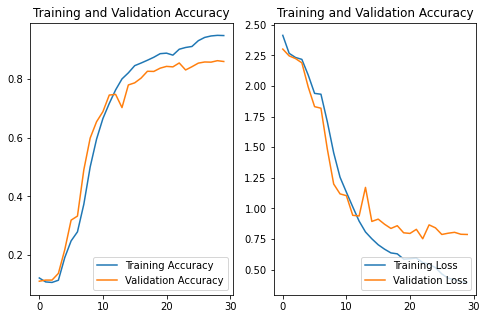

In [ ]:
plt.subplot(1,2,1)
plot_accuracies(history = history_for_nn4, epochs = 30, figsize = (8,5))

plt.subplot(1,2,2)
plot_loss(history = history_for_nn4, epochs = 30,figsize = (8,5))


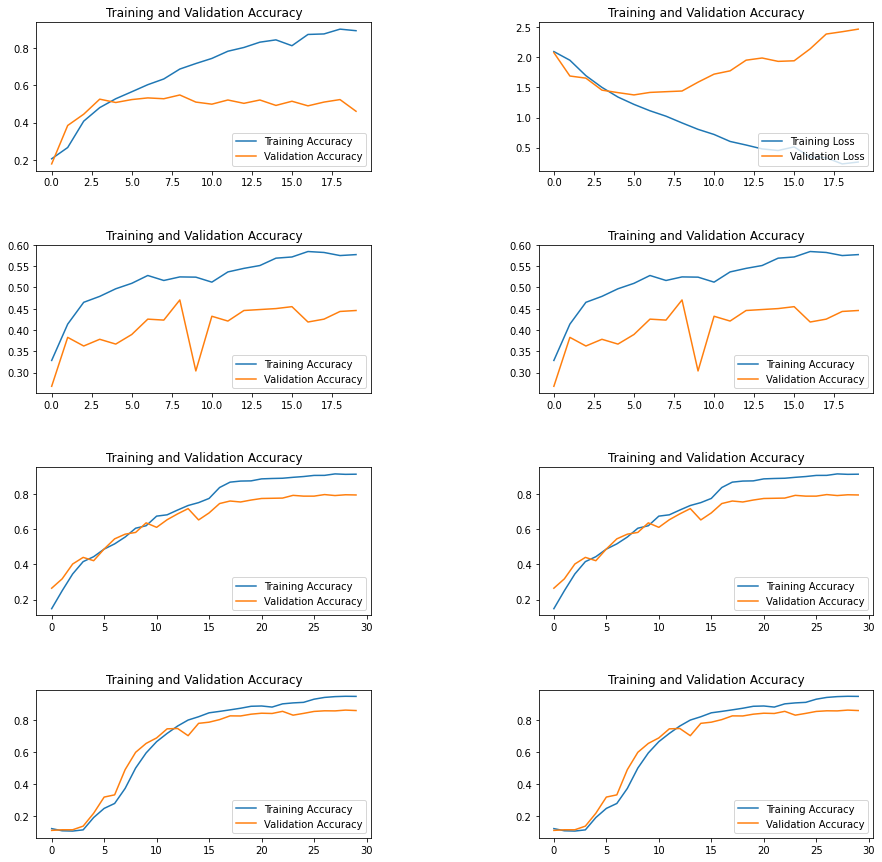

In [ ]:
figsize = (15,15)

plt.subplot(4,2,1)
plot_accuracies(history = history_for_nn1, epochs = 20, figsize = figsize)
plt.subplot(4,2,2)
plot_loss(history = history_for_nn1, epochs = 20, figsize = figsize)

plt.subplot(4,2,3)
plot_accuracies(history = history_for_nn2, epochs = 20, figsize = figsize)
plt.subplot(4,2,4)
plot_loss(history = history_for_nn2, epochs = 20, figsize = figsize)

plt.subplot(4,2,5)
plot_accuracies(history = history_for_nn3, epochs = 30, figsize = figsize)
plt.subplot(4,2,6)
plot_loss(history = history_for_nn3, epochs = 30, figsize = figsize)

plt.subplot(4,2,7)
plot_accuracies(history = history_for_nn4, epochs = 30, figsize = figsize)
plt.subplot(4,2,8)
plot_loss(history = history_for_nn4, epochs = 30, figsize = figsize)

plt.subplots_adjust( wspace=0.5, hspace=0.5)

# Recommended
- Please run the models and check the plots 

## Observations and conclusions
- It is clear from the graphs that the last model is consistemnt throughout and thus more relaible 
- From the first row till the last we tried using:

  - Simple Model : Gave us a model which was definitely overfitting
  - Used Image Augmentation : Gave us an underfitted model
  - Used Augmentor Library : It gave us more data to work with, when we used 500 images per claass we got a model which decreased the overfitting compared to previously seen and this was reasolved when we used 1000 images per class, as the increase in data allowed to model learn in a much better way. [NOTE: This is a worked out well but this would result in underfitting again in case the number of samples per class is increased more and more, which would require us to make our model more complex]
